In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib.animation as animation

In [2]:
def closest_node(position, nodes):
    x = position[0]
    y = position[1]
    
    min_distance = 2
    min_node = None
    node_index = -1
    for i in range(len(nodes)):
        node = nodes[i]
        curr_distance = math.sqrt((node[0] - x) ** 2 + (node[1] - y) ** 2) 
        if curr_distance < min_distance:
            min_node = node
            min_distance = curr_distance
            node_index = i
            
    return min_node, node_index

In [3]:
def voronoi_mapping(n, m):
    
    heatmap = [[None for i in range(n)] for i in range(n)]
    node_assignments = [[-1 for i in range(n)] for i in range(n)]
    guide = np.linspace(0, 1, n, endpoint = False)
    
    nodes = []
    color_dict = {}
    random.seed(1373)
    for i in range(m):
        curr_x = random.random()
        curr_y = random.random()
        curr_node = (curr_x, curr_y)
        nodes.append(curr_node)
        
        red = int(random.random() * 256)
        green = int(random.random() * 256)
        blue = int(random.random() * 256)
        
        color_dict[curr_node] = [red, green, blue]
        
    for i in range(n):
        x = guide[i]
        for j in range(n):
            y = guide[j]
            curr_pos = (x, y)
            voro_node, node_index = closest_node(curr_pos, nodes)
            curr_color = color_dict[voro_node]
            heatmap[i][j] = curr_color
            node_assignments[i][j] = node_index
    
    plt.figure(figsize = (8,8))
    plt.yticks(np.linspace(0, 1, 5))
    plt.xticks(np.linspace(0, 1, 5))
    plt.imshow(heatmap, interpolation = 'nearest', extent = [0, 1, 0 ,1])
    plt.show()
    
    return node_assignments, nodes
            

In [4]:
def edge_dict_gen(voro_map, nodes):
    edge_dict = {i : set() for i in range(len(nodes))}
    n = len(voro_map)
    prev = voro_map[0][0]
    
    for x in range(n):
        prev = voro_map[x][0]
        for y in range(n):
            curr = voro_map[x][y]
            if curr != prev:
                edge_dict[curr].add(prev)
                edge_dict[prev].add(curr)
                
            prev = curr
            
    for y in range(n):
        prev = voro_map[0][y]
        for x in range(n):
            curr = voro_map[x][y]
            if curr != prev:
                edge_dict[curr].add(prev)
                edge_dict[prev].add(curr)
                
            prev = curr
            
    return edge_dict

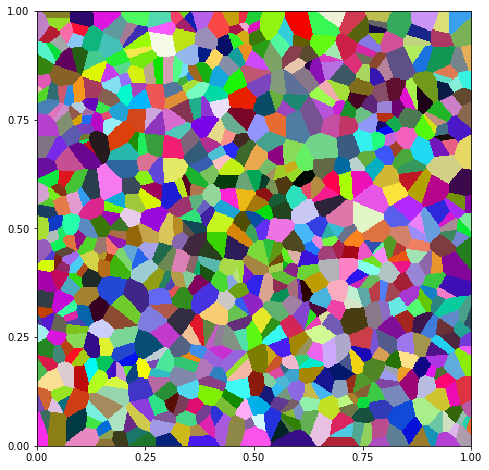

In [5]:
node_assignments, nodes = voronoi_mapping(400, 800)
edge_dict = edge_dict_gen(node_assignments, nodes)

In [ ]:
delay = 3
excluded = set()
edge_seed = 1962

random.seed(1373)
next_seed = edge_seed
for i in range(0):
    excluded.update(edge_dict[next_seed])
    edge_count = len(edge_dict[next_seed])
    next_seed = list(edge_dict[next_seed])[int(random.random() * edge_count)]
    
n = len(node_assignments)
m = len(nodes)
delay_dict = {i : 0 for i in range(m)}
activated_dict = {i : False for i in range(m)}


delay_dict[0] = delay
activated_dict[0] = True
heatmap = np.zeros((n,n))

def init():
    for x in range(n):
        for y in range(n):
            if node_assignments[x][y] == 0:
                heatmap[x][y] = 255

    return ax.matshow(heatmap, cmap="Greys_r")

def update(data):
    
    for node in delay_dict:
        delay_dict[node] = delay_dict[node] - 1 if delay_dict[node] > 0 else 0
    
    temp_activated_dict = activated_dict.copy()
    for node in activated_dict:
        if temp_activated_dict[node]:
            activated_dict[node] = False
            for neighbor in edge_dict[node]:
                if delay_dict[neighbor] == 0 and neighbor not in excluded:
                    delay_dict[neighbor] = delay
                    activated_dict[neighbor] = True

    
    heatmap = np.zeros((n,n))
    
    if data % 10 == 0:
        activated_dict[0] = True
        delay_dict[0] = delay
        
        
    for x in range(n):
        for y in range(n):
            curr_node = node_assignments[x][y]
            if activated_dict[curr_node]:
                heatmap[x][y] = 255

    
    return ax.matshow(heatmap, cmap="Greys_r")


fig, ax = plt.subplots()
mat = ax.matshow(heatmap, cmap="Greys_r")
ani = animation.FuncAnimation(fig, update, interval=50,
                          save_count=50, init_func = init)

from IPython.display import HTML
HTML(ani.to_jshtml())